In [1]:
import pandas, numpy, re, os, traceback
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import gridspec
import matplotlib.font_manager as fm
import matplotlib

In [ ]:
def os_path(list) : 
    os_path = os.path.dirname(os.path.dirname(os.getcwd()))
    for i in list : 
        os_path = os.path.join(os_path, i)
    return os_path

# 台北市社會增加量_圖形繪製

In [4]:
# 遍歷資料夾中的每一個 data，並將其路徑儲存成一個list。
data_path_list = []
data_path_generator = os.walk(os_path(["database", "縣市遷出及遷入資料"]))
for dirs, dirname, files in data_path_generator :
    for file in files : 
        data_path_list.append(os.path.join(dirs, file))

data_list_101_104 = []
data_list_105_111 = []
for data_path in data_path_list : 
    try : 
        df = pandas.read_excel(data_path,  header=2, sheet_name= "01-12累計")
        df["區域別"] = df["區域別"].fillna("Na")
        df = df[["區域別", "遷入人數", "遷出人數", "Unnamed: 3", "Unnamed: 18"]] # Unnamed: 3 = 國外移入人口、Unnamed: 18 = 往國外移出人口。
        cuonty_list = df["區域別"].unique()[2:]

        # 創建一個字典物件，蒐集每一年各縣市，遷入人口-遷出人口的數值。
        for county in cuonty_list : 
            county_index = df[df["區域別"] == county].index[0] 
            social_increase_population = df.iloc[(county_index-1)]["遷入人數"] - df.iloc[(county_index-1)]["遷出人數"]

            result = {"年份" : data_path[-8 : -5], "縣市別" : county, 
                    "社會人口淨增加數" : social_increase_population, 
                    "控制國外遷移之社會人口增加數" : social_increase_population - (df.iloc[(county_index-1)]["Unnamed: 3"] - df.iloc[(county_index-1)]["Unnamed: 18"])
                    }
            data_list_105_111.append(result)
    except : # 101-104年資料格式不一樣。# 不存在統整好的 01-12月的統整性資料。
        xls_file = pandas.ExcelFile(data_path)
        sheet_names = xls_file.sheet_names
        for sheet_name in sheet_names : 
            df = pandas.read_excel(data_path,  header=2, sheet_name= sheet_name)
            df["區域別"] = df["區域別"].fillna("Na")
            df = df[["區域別", "遷入人數", "遷出人數", "Unnamed: 3", "Unnamed: 18"]] # Unnamed: 3 = 國外移入人口、Unnamed: 18 = 往國外移出人口。
            cuonty_list = df["區域別"].unique()[2:]

            # 創建一個字典物件，蒐集每一年各縣市，遷入人口-遷出人口的數值。
            for county in cuonty_list : 
                county_index = df[df["區域別"] == county].index[0] 
                social_increase_population = df.iloc[(county_index-1)]["遷入人數"] - df.iloc[(county_index-1)]["遷出人數"]

                result = {"年份" : data_path[-8 : -5], "縣市別" : county, 
                        "社會人口淨增加數" : social_increase_population, 
                        "控制國外遷移之社會人口增加數" : social_increase_population - (df.iloc[(county_index-1)]["Unnamed: 3"] - df.iloc[(county_index-1)]["Unnamed: 18"])
                        }
                data_list_101_104.append(result)

# 將兩組list，分別儲存為 DataFrame。
data_county_105_111 = pandas.DataFrame(data_list_105_111)
data_county_101_104 = pandas.DataFrame(data_list_101_104)

data_list_token = []
for year in data_county_101_104["年份"].unique() : 
    df_year = data_county_101_104[data_county_101_104["年份"] == year].copy()
    for county in df_year["縣市別"].unique() : 
        df_county = df_year[df_year["縣市別"] == county]
        result = {"年份" : year, "縣市別" : county, "社會人口淨增加數" : df_county["社會人口淨增加數"].sum(), "控制國外遷移之社會人口增加數" : df_county["控制國外遷移之社會人口增加數"].sum()}
        data_list_token.append(result)
data_county_101_104 = pandas.DataFrame(data_list_token)

data_county_101_111 = pandas.concat([data_county_101_104, data_county_105_111])

In [5]:
# 資料預處理 - 年份轉數字型別。
data_county_101_111["年份"] = data_county_101_111["年份"].astype(float)

In [6]:
# 儲存合併完整之檔案，以利後續持續分析。
data_county_101_111.to_csv(os_path(["database_clean", "101_111_縣市遷出遷入.csv"]), index=False)

In [60]:
# 創建圖片儲存資料夾
# 建立圖片存放位置
output_folder_path = os_path(["picture", "台北市社會增加量"])
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)
else:
    pass

In [8]:
# 社會增加人口
matplotlib.rcParams["font.family"] = "simsun"
plt.title("臺北市社會人口增加量")
plt.xlabel("年份")
plt.xticks(rotation= 0)

# 為每一個縣市繪製折線圖
for county in data_county_101_111["縣市別"].unique()[1:2] : 
    df_county = data_county_101_111[data_county_101_111["縣市別"] == county].copy()
    
    # 將時間順序由小到大排列。
    df_county = df_county.sort_values(by= ["年份"])

    plt.plot(data_county_101_111["年份"].unique(), df_county["社會人口淨增加數"].values, label= county)

    
plt.xticks(data_county_101_111["年份"].unique(), rotation= 0)

plt.legend()
plt.savefig(os_path(["picture", "台北市社會增加量", "plot_台北市社會增加量.png"]), dpi=200, bbox_inches = "tight")
plt.close()

C:\Users\Sigolon\AppData\Local\Temp\ipykernel_16804\3041633278.py:19: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(os.path.join(os.getcwd(), "picture", "台北市社會增加量", "plot_台北市社會增加量(不含國際遷移).png"), dpi=200, bbox_inches = "tight")


<function matplotlib.pyplot.show(close=None, block=None)>

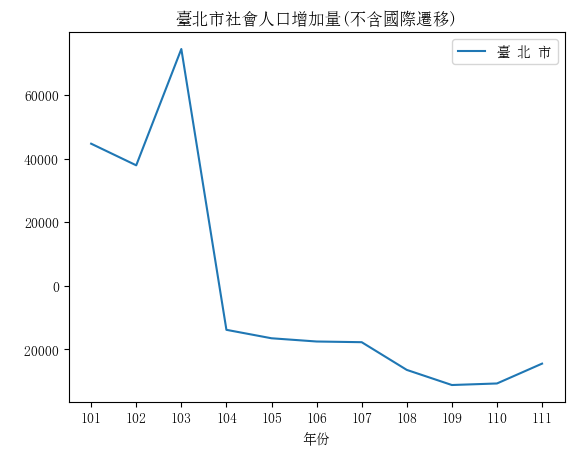

In [9]:
# 社會增加人口
matplotlib.rcParams["font.family"] = "simsun"
plt.title("臺北市社會人口增加量(不含國際遷移)")
plt.xlabel("年份")
plt.xticks(rotation= 0)

# 為每一個縣市繪製折線圖
for county in data_county_101_111["縣市別"].unique()[1:2] : 
    df_county = data_county_101_111[data_county_101_111["縣市別"] == county].copy()
    
    # 將時間順序由小到大排列。
    df_county = df_county.sort_values(by= ["年份"])

    plt.plot(data_county_101_111["年份"].unique(), df_county["控制國外遷移之社會人口增加數"].values, label= county)

    
plt.xticks(data_county_101_111["年份"].unique(), rotation= 0)
plt.legend()
plt.savefig(os_path(["picture", "台北市社會增加量", "plot_台北市社會增加量(不含國際遷移).png"]), dpi=200, bbox_inches = "tight")
plt.show

# 物價指數年增率

In [6]:
df = pandas.read_excel(os_path(["database", "物價指數年增率.xls"]), sheet_name= "年增率", header=3)

In [12]:
df = df[~(df["民國年"] == "註：由於受查者延誤或更正報價，最近3個月資料均可能修正。")]
df["民國年"] = df["民國年"].astype(float)
df = df[(df["民國年"] >= 107) & (df["民國年"] != 112)]
df = df[["民國年", "全年"]]
df

,民國年,全年
58,107.0,1.36
59,108.0,0.55
60,109.0,-0.23
61,110.0,1.97
62,111.0,2.95


In [15]:
# 創建圖片儲存資料夾
# 建立圖片存放位置
output_folder_path = os_path(["picture", "台北市物價增長率"])
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)
else:
    pass

In [16]:
Taipai_list =  [0.98, 0.83, -0.18, 1.55, 2.69]
matplotlib.rcParams["font.family"] = "simsun"

plt.xlabel("年份")
plt.title("物價指數年增率")
plt.plot(df["民國年"].unique(), Taipai_list, label = "台北市物價增長率")
plt.plot(df["民國年"].unique(), df["全年"].values, label = "全台物價增長率")
plt.xticks(df["民國年"].unique())
plt.legend()
plt.savefig(os_path(["picture", "台北市物價增長率", "plot_台北市物價增長率.png"]), dpi=200, bbox_inches = "tight")
plt.close()


# 台北市常住人口、居住人口比較_2020

In [25]:
df = pandas.read_xml(os_path(["database", "住戶數常住人口數及平均每戶人口數.xml"]))
df.head(5)

,按縣市別分,總計_戶數_戶_Grand_total_Number_of_households_household,總計_常住人口數_人_Grand_total_Number_of_resident_population_person,總計_平均每戶人口數_Grand_total_Average_number_of_persons_per_household,普通住戶_戶數_戶_Ordinary_households_Number_of_households_household,普通住戶_常住人口數_人_Ordinary_households_Number_of_resident_population_person,普通住戶_平均每戶人口數_Ordinary_households_Average_number_of_persons_per_household,非普通住戶_戶數_戶_Group_quarters_Number_of_households_household,非普通住戶_常住人口數_人_Group_quarters_Number_of_resident_population_person,非普通住戶_平均每戶人口數_Group_quarters_Average_number_of_persons_per_household,By_county_city
0,總計,8086905,23829897,2.9,8033191,22541284,2.8,53714,1288613,24.0,Grand Total
1,北部地區,3890142,11334806,2.9,3870578,10808085,2.8,19564,526721,26.9,Northern Region
2,新北市,1532931,4365947,2.8,1526303,4255681,2.8,6628,110266,16.6,New Taipei City
3,臺北市,938041,2594581,2.8,935990,2488641,2.7,2051,105940,51.7,Taipei City
4,桃園市,769641,2441064,3.2,763346,2258160,3.0,6295,182904,29.1,Taoyuan City


In [26]:
df[df["按縣市別分"]=="臺北市"]["總計_平均每戶人口數_Grand_total_Average_number_of_persons_per_household"].values[0]

2.8

In [29]:
(df[df["按縣市別分"]=="臺北市"]["總計_戶數_戶_Grand_total_Number_of_households_household"].values[0])*(df[df["按縣市別分"]=="臺北市"]["總計_平均每戶人口數_Grand_total_Average_number_of_persons_per_household"].values[0])

2626514.8

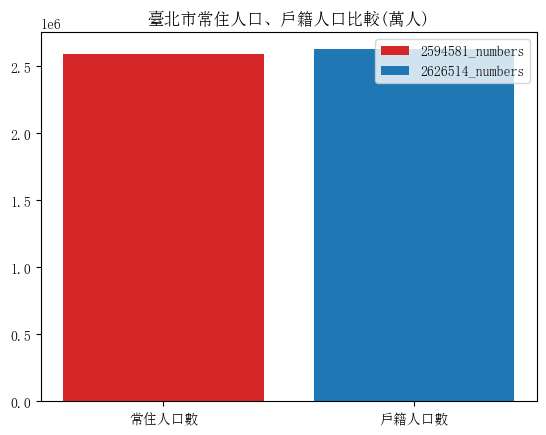

In [33]:
Taipai_household = int(df[df["按縣市別分"]=="臺北市"]["總計_戶數_戶_Grand_total_Number_of_households_household"].values[0]*df[df["按縣市別分"]=="臺北市"]["總計_平均每戶人口數_Grand_total_Average_number_of_persons_per_household"].values[0])
Taipai_permanent = df[df["按縣市別分"]=="臺北市"]["總計_常住人口數_人_Grand_total_Number_of_resident_population_person"].values[0]
# 繪製長條圖
bar_labels = [f'{Taipai_permanent}_numbers', f'{Taipai_household}_numbers']
bar_colors = ['tab:red', 'tab:blue']
token = {"常住人口數" : Taipai_permanent, "戶籍人口數" : Taipai_household}
plt.bar(token.keys(), token.values(), label=bar_labels, color=bar_colors)
plt.title('臺北市常住人口、戶籍人口比較(萬人)')
plt.legend()
plt.savefig(os_path(["picture", "臺北市戶籍人口、常住人口", "戶籍人口、常住人口比較"]), dpi = 200, bbox_inches = "tight")
plt.show()